left lane:84
right lane:156
car 121switched to left lane
car 171switched to left lane
car 196switched to left lane
car 223switched to left lane
car 243switched to left lane
car 151switched to right lane
car 67switched to left lane
car 106switched to left lane
car 199switched to left lane
car 224switched to left lane
car 234switched to left lane
car 281switched to left lane
car 218switched to left lane
car 266switched to left lane
car 55switched to left lane
car 159switched to left lane
car 204switched to left lane
car 10switched to left lane
car 38switched to left lane
car 283switched to left lane
car 14switched to left lane
car 43switched to left lane
car 287switched to left lane
car 64switched to left lane
car 248switched to right lane
car 195switched to left lane
car 191switched to left lane
car 89switched to right lane
car 89switched to left lane
car 279switched to left lane
car 155switched to right lane
car 33switched to left lane
car 143switched to left lane
car 65switched to lef

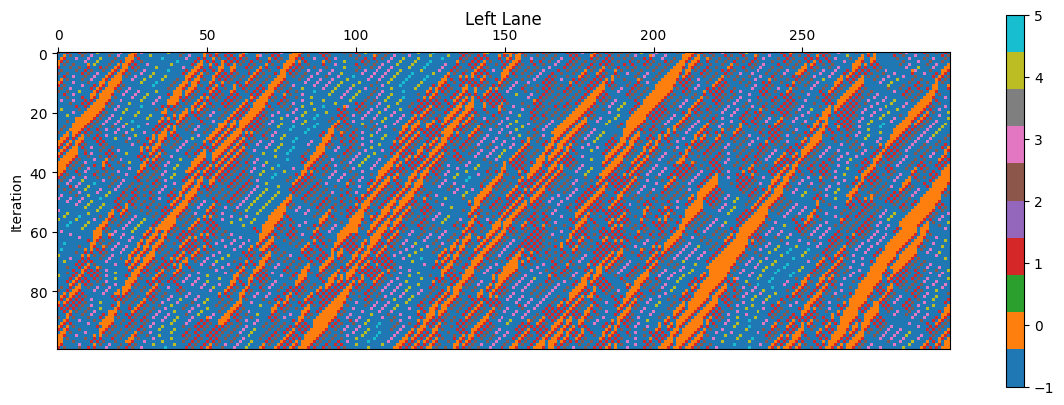

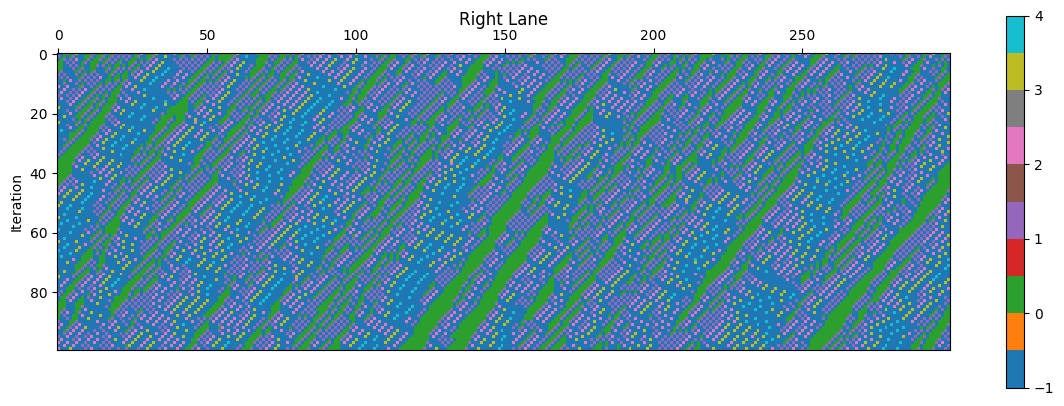

In [147]:
import random
import matplotlib.pyplot as plt
import numpy as np

###########################################
#           GLOBAL VARIABLES
###########################################
num_cars = 240 # number of cars on the road(10% = 30 cars, 25% = 75 cars, 50% = 150 cars, 80% = 240 cars)
p = 0.2 #randomizer probiblity
num_cells = 300

v_max = 5 #for one lane only
left_vmax = 5
right_vmax = 4

###########################################
#               CAR CLASS
###########################################
class car:
    def __init__(self, curr_vel, position):
        self.curr_vel = curr_vel
        self.position = position

###########################################
#             INITALIZATION
###########################################
matrix = np.full((100, num_cells), -1)
matrix2 = np.full((100, num_cells), -1)

def init_road(num_cells):
  cells = []
  for i in range(num_cells):
    cells.append(i)
  return cells

def add_cars(num_cars, cells, num_cells):
  count = 0
  while count != num_cars:
    spot = random.randint(0, num_cells - 1)
    if isinstance(cells[spot], int):
        cells[spot] = car(random.randint(0, 5), spot)
        count = count + 1
  return cells

###########################################
#                 4 STEPS
###########################################
def accelerate(cells, vmax, i, matrix_num):
  j = 0
  while j != len(cells):
    if isinstance(cells[j], car):
        curr_car = cells[j]
        curr_car.curr_vel = min(curr_car.curr_vel + 1, vmax) #accelerate
        matrix_num[i, j] = cells[j].curr_vel
    j = j + 1

def decelerate(cells, i, matrix_num):
  j = 0
  while j != len(cells):
    if isinstance(cells[j], car):
      if cells[j].curr_vel > distance(cells, j, num_cells):
          cells[j].curr_vel = distance(cells, j, num_cells) #deccelerate
      matrix_num[i, j] = cells[j].curr_vel
    j = j + 1

def dally(cells, p, i, matrix_num):
  j = 0
  while j != len(cells):
    if isinstance(cells[j], car):
      if random.random() < p:
        cells[j].curr_vel = max(cells[j].curr_vel - 1, 0)
      matrix_num[i, j] = cells[j].curr_vel
    j = j + 1

def move(cells, num_cells):
  cells2 = init_road(num_cells)
  j = 0
  while j != len(cells):
      if isinstance(cells[j], car):
          cells[j].position = (j + cells[j].curr_vel) % num_cells
          cells2[cells[j].position] = cells[j]
      j = j + 1
  return cells2

###########################################
#                MODELS
###########################################
#CA model with four steps: accelerate, decelerate, randomize, and move
def CA_model(num_cars, p):
    cells = init_road(num_cells)
    cells = add_cars(num_cars, cells, num_cells)

    for i in range(100):
      accelerate(cells, v_max, i, matrix)
      decelerate(cells, i, matrix)
      dally(cells, p, i, matrix)
      cells = move(cells, num_cells)
    print(matrix)


def CA_model2(num_cars, p, left_vmax, right_vmax):
  cells = init_road(300)
  cells2 = init_road(300)
  random_cars = random.randint(0, num_cars)
  cells = add_cars(random_cars, cells, num_cells)
  cells2 = add_cars(num_cars - random_cars, cells2, num_cells)

  print("left lane:" + str(random_cars))
  print("right lane:" + str(num_cars - random_cars))

  for i in range(100):
        accelerate(cells, left_vmax, i, matrix)
        accelerate(cells2, right_vmax, i, matrix2)

        # check lanes start
        j = 0
        while j != len(cells):
            if isinstance(cells[j], car):
                if cells[j].curr_vel > distance(cells, j, num_cells):
                  free = check_lanes(cells, cells2, j, cells, num_cells)
                  if free == True:
                    print("car " + str(j) + "switched to right lane")
                    switch_lanes(cells, cells2, j, cells, i)
            j = j + 1
        j = 0
        while j != len(cells):
            if isinstance(cells2[j], car):
                if cells2[j].curr_vel > distance(cells2, j, num_cells):
                  free = check_lanes(cells, cells2, j, cells2, num_cells)
                  if free == True:
                    print("car " + str(j) + "switched to left lane")
                    switch_lanes(cells, cells2, j, cells2, i)
            j = j + 1
        # check lanes end

        decelerate(cells, i, matrix)
        decelerate(cells2, i, matrix2)

        dally(cells, p, i, matrix)
        dally(cells2, p, i, matrix2)

        cells = move(cells, num_cells)
        cells2 = move(cells2, num_cells)

###########################################
#           HELPER FUNCTIONS
###########################################
def distance(cells, index, num_cells):
  for dist in range(1, num_cells):  # start from the next cell
      next_index = (index + dist) % num_cells
      if isinstance(cells[next_index], car):
          return dist-1  # return the distance to the next car
  return num_cells-1  # if no car is found, return the maximum distance

def switch_lanes(cells, cells2, index, curr_lane, i):
  cells3 = init_road(num_cells)
  cells4 = init_road(num_cells)
  curr_car = curr_lane[index]

  if curr_lane == cells: #we are in left lane, switch to right lane
    cells[index].curr_vel = min(cells[index].curr_vel, right_vmax)

    cells[index] = -1
    matrix[i, index] = -1

    cells2[index] = curr_car
    matrix2[i, index] = curr_car.curr_vel

  if curr_lane == cells2: # we are in right lane, switch to left lane
    cells2[index].curr_vel = min(cells2[index].curr_vel, left_vmax)

    cells2[index] = -1
    matrix2[i, index] = -1

    cells[index] = curr_car
    matrix[i, index] = curr_car.curr_vel


def check_lanes(cells, cells2, index, curr_lane, num_cells):
  curr_car = curr_lane[index]
  curr_vel = curr_car.curr_vel
  forward_free = True
  behind_free = True

  # start forward
  if curr_lane == cells: # we are in left lane, check right lane
    for i in range(0, curr_vel):
      check_index = (index + i) % num_cells
      if isinstance(cells2[check_index], car):
        forward_free = False

  if curr_lane == cells2: # we are in right lane, check left lane
    for i in range(0, curr_vel):
      check_index = (index + i) % num_cells
      if isinstance(cells[check_index], car):
        forward_free = False
  # end forward

  # start behind
  if curr_lane == cells: # we are in left lane, check right lane
    for i in range(0, right_vmax + 1):
      check_index = (index - i) % num_cells
      if isinstance(cells2[check_index], car):
        if cells2[check_index].curr_vel >= i - 1:
          forward_free = False


  if curr_lane == cells2: # we are in right lane, check left lane
    for i in range(0, left_vmax + 1):
      check_index = (index - i) % num_cells
      if isinstance(cells[check_index], car):
        if cells[check_index].curr_vel >= i - 1:
          forward_free = False
  #end behind

  if forward_free & behind_free:
    return True
  else:
    return False

###########################################
#               PLOTTING
###########################################

CA_model2(num_cars, p, left_vmax, right_vmax)
plt.matshow(matrix, cmap = 'tab10')
plt.colorbar()
plt.title('Left Lane', pad=20)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.ylabel('Iteration')
plt.show()

plt.matshow(matrix2, cmap = 'tab10')
plt.colorbar()
plt.title('Right Lane', pad=20)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.ylabel('Iteration')
plt.show()

"""
CA_model(num_cars, p)
plt.matshow(matrix, cmap = 'tab10')
cbar = plt.colorbar()
plt.title('Position', pad=20)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.ylabel('Iteration')
"""
###########################################
#               verification
# annotates cells and shows each car's speed
###########################################
"""
iter = 100

# matrix 1
fig, ax = plt.subplots()
im = ax.imshow(matrix, cmap = 'tab10')
ax.set_xticks(np.arange(num_cells))
ax.set_yticks(np.arange(iter))
ax.set_title("left lane", pad = 10)

for i in range(iter):
    for j in range(num_cells):
        text = ax.text(j, i, matrix[i, j], ha="center", va="center", color="w")
# matrix 2
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(matrix2, cmap = 'tab10')
ax2.set_xticks(np.arange(num_cells))
ax2.set_yticks(np.arange(iter))
ax2.set_title("right lane", pad =10)

for i in range(iter):
    for j in range(num_cells):
        text = ax2.text(j, i, matrix2[i, j], ha="center", va="center", color="w")

"""
plt.show()